# LAPD Calls for Service 
## Tracking Calls for Service Typology in LA Neighborhoods
### 2020

#### Call Code Methodology


I am analyzing data using Calls for Service Data.  This data set lists information regarding call typology, report district, report code, and coordinates.  For this assignment, I have selected a typology of calls which I believe are directly correlated to gentrification.  The arrest typology I will use, within the dataset, is the "Call Type Code." I have chosen to look at calls for service as opposed to arrests as opposed to arrest data as many times in gentrifying neighborhoods, the police are used as tools of intimidation. These calls may not constitute arrests, but the intimidation still exists. The call typeology (inputs) I used are calls for "Parties","Landlord/Tenant","Traffic/Racing", "General Disturbance".  This methodology is guided by previous research from the Urban Institute Initiative: Housing Matters.
Link to Study: https://housingmatters.urban.org/research-summary/neighborhoods-gentrify-police-presence-increases

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import plotly.express as px

Importing tools 

In [2]:
lahoods = gpd.read_file('LA_Times_Neighborhood_Boundaries.geojson')

This is the LA Times Neighborhood boundary data.

In [3]:
police = gpd.read_file('LAPD_Divisions (1).geojson')

This is a map of the precinct boundaries for LAPD. I will layer this on top of the LA times neighborhood boundaries information

In [5]:
calls = pd.read_csv('LAPD_Calls_for_Service_2020.csv')

I have uploaded a data set which shows calls for service in 2020.  I am interested to see if there is an impact of COVID on increases to calls, as people were at home. I have also created a dataframe for this. 

In [68]:
df= police.merge(calls, left_on="APREC",right_on="Area_Occ", how="outer") 
df.dropna()

OBJECTID    APREC  PREC          AREA      PERIMETER  SHAPE_Length  \
0           1.0  Mission  19.0  6.995826e+08  190817.495739      0.576177   
1           1.0  Mission  19.0  6.995826e+08  190817.495739      0.576177   
2           1.0  Mission  19.0  6.995826e+08  190817.495739      0.576177   
3           1.0  Mission  19.0  6.995826e+08  190817.495739      0.576177   
4           1.0  Mission  19.0  6.995826e+08  190817.495739      0.576177   
...         ...      ...   ...           ...            ...           ...   
53839      21.0  Central   1.0  1.367477e+08   64187.406589      0.190474   
53840      21.0  Central   1.0  1.367477e+08   64187.406589      0.190474   
53841      21.0  Central   1.0  1.367477e+08   64187.406589      0.190474   
53842      21.0  Central   1.0  1.367477e+08   64187.406589      0.190474   
53843      21.0  Central   1.0  1.367477e+08   64187.406589      0.190474   

       SHAPE_Area                                           geometry  \
0        0.006363  MULTIPOLYGON (((-118.50736 34.33464, -118.5038...   
1        0.006363  MULTIPOLYGON (((-118.50736 34.33464, -118.5038...   
2        0.006363  MULTIPOLYGON (((-118.50736 34.33464, -118.5038...   
3        0.006363  MULTIPOLYGON (((-118.50736 34.33464, -118.5038...   
4        0.006363  MULTIPOLYGON (((-118.50736 34.33464, -118.5038...   
...           ...                                                ...   
53839    0.001240  MULTIPOLYGON (((-118.25196 34.07419, -118.2518...   
53840    0.001240  MULTIPOLYGON (((-118.25196 34.07419, -118.2518...   
53841    0.001240  MULTIPOLYGON (((-118.25196 34.07419, -118.2518...   
53842    0.001240  MULTIPOLYGON (((-118.25196 34.07419, -118.2518...   
53843    0.001240  MULTIPOLYGON (((-118.25196 34.07419, -118.2518...   

        Incident_Number Area_Occ  Rpt_Dist           Dispatch_Date  \
0      PD20032100002452  Mission    1989.0  03/21/2020 12:00:00 AM   
1      PD20032600004148  Mission    1951.0  03/26/2020 12:00:00 AM   
2      PD20032600004657  Mission    1909.0  03/26/2020 12:00:00 AM   
3      PD20032200002863  Mission    1981.0  03/22/2020 12:00:00 AM   
4      PD20032700001671  Mission    1955.0  03/27/2020 12:00:00 AM   
...                 ...      ...       ...                     ...   
53839  PD20071700002432  Central     147.0  07/17/2020 12:00:00 AM   
53840  PD20090800001843  Central     124.0  09/08/2020 12:00:00 AM   
53841  PD20100700004220  Central     185.0  10/07/2020 12:00:00 AM   
53842  PD20050700002720  Central     156.0  05/07/2020 12:00:00 AM   
53843  PD20061500002617  Central     124.0  06/15/2020 12:00:00 AM   

      Dispatch_Time Call_Type_Code   Call_Type_Text  
0          14:15:24           620L  LANDLORD/TENANT  
1          18:08:16           620L  LANDLORD/TENANT  
2          19:44:49           620L  LANDLORD/TENANT  
3          16:51:02           620L  LANDLORD/TENANT  
4          10:48:43           620L  LANDLORD/TENANT  
...             ...            ...              ...  
53839      14:33:31            904          TRAFFIC  
53840      10:39:19            904          TRAFFIC  
53841      18:58:15            904          TRAFFIC  
53842      12:31:27            594        VANDALISM  
53843      14:35:31            594        VANDALISM  

[53844 rows x 15 columns]

I have merged the calls and precinct data by the name of the precinct.  This will show where the calls have occured

In [69]:
counts = df['APREC'].value_counts()

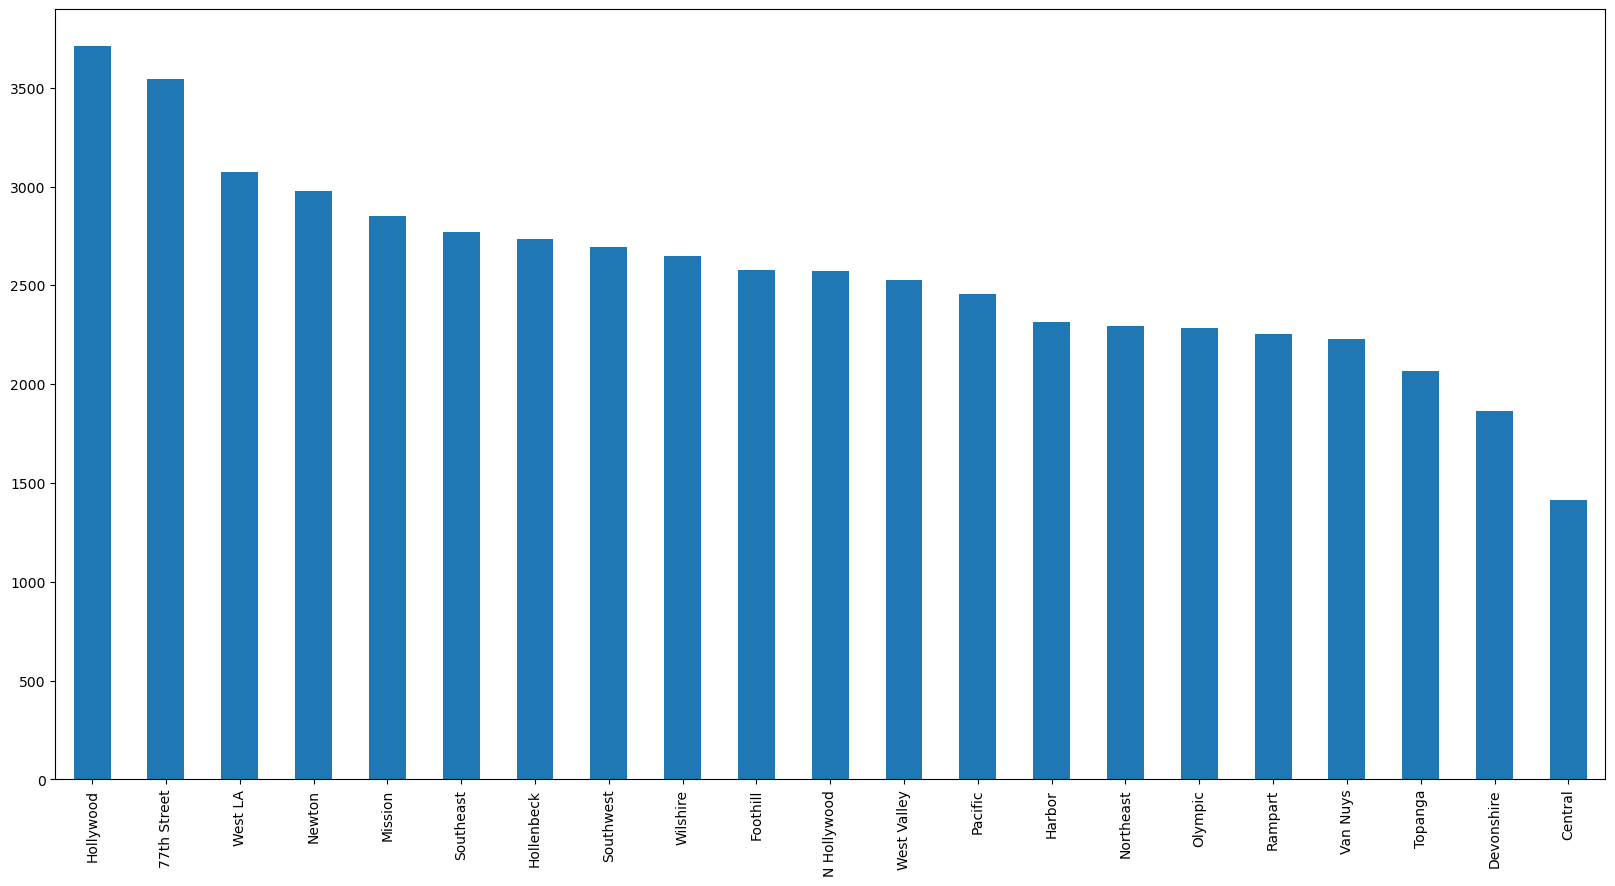

In [70]:
calls_area = counts.plot.bar(figsize=(20,10),
                             x='APREC',
                             y='counts')

In [71]:
amount = pd.read_csv('LAPD Calls Precinct 2020 - Sheet1 (6).csv')

This is a pretty crude and round about way of going about this but I could not figure out how to merge the "Value Counts" for each precinct with the gjson of the precincts.  What I did is creat a separate CSV with the ObjectIDs matching and the counts themselves. 

In [78]:
callmap= police.merge(amount, left_on="PREC",right_on="ID", how="outer") 

I am then able to merge this.

In [102]:
callmap.index = callmap['APREC']
fig = px.choropleth_mapbox(callmap, geojson=callmap.geometry, locations=callmap.index, color='Call Amount',
                           color_continuous_scale="viridis",
                           mapbox_style="carto-positron",
                           zoom=6, center = {"lat": 34.14218, "lon": -118.28411},
                           opacity=1.0)

In [ ]:
This first figure is a choropleth showing the call amounts in each precinct.  

In [103]:
lahoods.index = lahoods['name']
fig2 = px.choropleth_mapbox(lahoods, geojson=lahoods.geometry,locations=lahoods.index, color='OBJECTID',
                           color_continuous_scale="viridis",
                           mapbox_style="carto-positron",
                           zoom=6, center = {"lat": 34.14218, "lon": -118.28411},
                           opacity=0.1)

This second map is layering the boundaries of the LA Neighborhoods into plotly.

In [100]:
lamap = fig.add_trace(
    fig2.data[0])

In [ ]:
I feel like this is a rather clunky way to do this but it definitely works.  

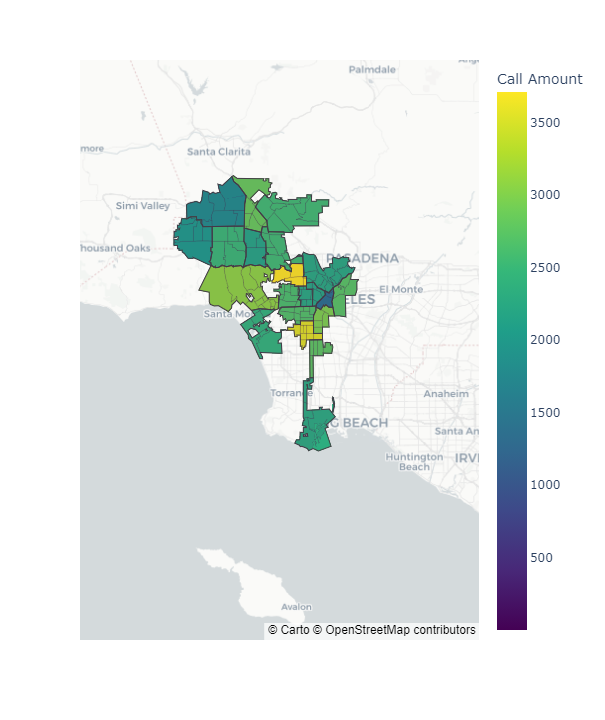

In [101]:
lamap

In this visualization, we can the LAPD precincts outlined throughout the city and with the lighter boundaries of the individual neighborhoods.  In this map, we can see the highest amount of calls for service for the "inputs" I used regarding call typology are most present in the Hollywood Area and in the Leimert Park area.  I hope in the future to expand this data to include % change, this can be layered on top of Joshua and Miles' visualizations to capture the use of police, via calls for service, as a means of furthering gentrification in these neighborhoods.  